# Ensemble Learning

## Initial Imports

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [13]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Read the CSV and Perform Basic Data Cleaning

In [14]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 86 columns):
loan_amnt                     68817 non-null float64
int_rate                      68817 non-null float64
installment                   68817 non-null float64
home_ownership                68817 non-null object
annual_inc                    68817 non-null float64
verification_status           68817 non-null object
issue_d                       68817 non-null object
loan_status                   68817 non-null object
pymnt_plan                    68817 non-null object
dti                           68817 non-null float64
delinq_2yrs                   68817 non-null float64
inq_last_6mths                68817 non-null float64
open_acc                      68817 non-null float64
pub_rec                       68817 non-null float64
revol_bal                     68817 non-null float64
total_acc                     68817 non-null float64
initial_list_status           68817 non-null obj

## Split the Data into Training and Testing

In [16]:
# Create our features
X = df.copy()
X.drop('loan_status',axis=1,inplace=True)
X=pd.get_dummies(X) # to convert objects into binary data ( 1 is where instance was present)
# Create our target
y=df['loan_status']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 95 columns):
loan_amnt                              68817 non-null float64
int_rate                               68817 non-null float64
installment                            68817 non-null float64
annual_inc                             68817 non-null float64
dti                                    68817 non-null float64
delinq_2yrs                            68817 non-null float64
inq_last_6mths                         68817 non-null float64
open_acc                               68817 non-null float64
pub_rec                                68817 non-null float64
revol_bal                              68817 non-null float64
total_acc                              68817 non-null float64
out_prncp                              68817 non-null float64
out_prncp_inv                          68817 non-null float64
total_pymnt                            68817 non-null float64
total_pymnt_inv        

In [18]:
# Check the balance of our target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [19]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)


## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [20]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler=scaler.fit(X_train)

In [22]:
# Scale the training and testing data
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [46]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=500, random_state=1)
brf_model.fit(X_train_scaled, y_train)
y_pred_brf = brf_model.predict(X_test_scaled)

In [32]:
# Calculated the balanced accuracy score
acc_score_brf=balanced_accuracy_score(y_test,predictions)
acc_score_brf

0.7781475469810779

In [47]:
# Display the confusion matrix
print(confusion_matrix(y_test,y_pred_brf))

[[   66    35]
 [ 1662 15442]]


In [48]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test,y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.65      0.90      0.07      0.77      0.58       101
   low_risk       1.00      0.90      0.65      0.95      0.77      0.60     17104

avg / total       0.99      0.90      0.65      0.94      0.77      0.60     17205



In [49]:
# List the features sorted in descending order by feature importance
importance=brf_model.feature_importances_

importances_sorted = sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.06661463495120314, 'total_rec_prncp'),
 (0.06318721529567178, 'total_rec_int'),
 (0.06061788889673201, 'total_pymnt'),
 (0.05826808075239343, 'total_pymnt_inv'),
 (0.0517793455702452, 'last_pymnt_amnt'),
 (0.030814261825048914, 'int_rate'),
 (0.018223876144473468, 'issue_d_Jan-2019'),
 (0.01758748442537316, 'installment'),
 (0.01701350913498804, 'dti'),
 (0.01643946938793743, 'mo_sin_old_rev_tl_op')]

In [51]:

rf_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
acc_score_rf=balanced_accuracy_score(y_test,y_pred_rf)
acc_score_rf
print(confusion_matrix(y_test,y_pred_rf))
importance=rf_model.feature_importances_

importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[[   37    64]
 [    5 17099]]


[(0.07486922500536883, 'total_rec_int'),
 (0.06686220515014932, 'total_pymnt_inv'),
 (0.06573260493444634, 'total_rec_prncp'),
 (0.06380464409414062, 'last_pymnt_amnt'),
 (0.05475103896804395, 'total_pymnt'),
 (0.021471589076600003, 'installment'),
 (0.02111947211128395, 'out_prncp_inv'),
 (0.01926514456622541, 'out_prncp'),
 (0.01745217216062875, 'dti'),
 (0.01581677533386419, 'mo_sin_old_il_acct')]

In [52]:
acc_score_rf

0.6830221521918328

In [53]:
print(confusion_matrix(y_test,y_pred_rf))

[[   37    64]
 [    5 17099]]


In [54]:
print(classification_report_imbalanced(y_test,y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.65      0.90      0.07      0.77      0.58       101
   low_risk       1.00      0.90      0.65      0.95      0.77      0.60     17104

avg / total       0.99      0.90      0.65      0.94      0.77      0.60     17205



importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

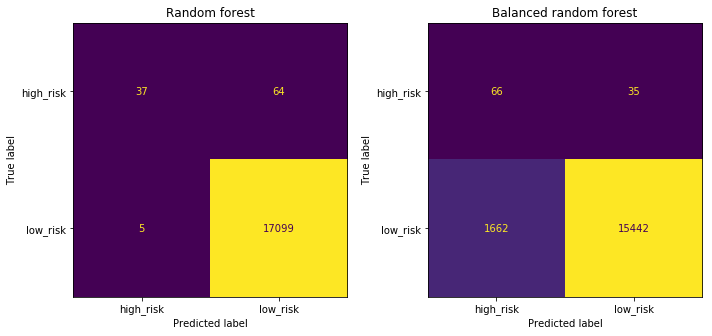

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
plot_confusion_matrix(rf_model, X_test_scaled, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("Random forest")

plot_confusion_matrix(brf_model, X_test_scaled, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("Balanced random forest")

fig.tight_layout()

### Easy Ensemble Classifier

In [56]:
# Train the Classifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier

base_estimator = AdaBoostClassifier(n_estimators=10)
eec = EasyEnsembleClassifier(n_estimators=10, base_estimator=base_estimator)
eec.fit(X_train_scaled, y_train)
y_pred_eec = eec.predict(X_test_scaled)

rusboost = RUSBoostClassifier(n_estimators=10, base_estimator=base_estimator)
rusboost.fit(X_train_scaled, y_train)
y_pred_rusboost = rusboost.predict(X_test_scaled)

# Calculated the balanced accuracy score
print("Easy ensemble classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_eec):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_eec):.2f}"
)
print("RUSBoost classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_rusboost):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_rusboost):.2f}"
)

In [57]:
# Print the imbalanced classification report

print("Easy ensemble classifier classification report:")
print(classification_report_imbalanced(y_test,y_pred_eec))
    
print("RUSBoost classifier classification report:")
print(classification_report_imbalanced(y_test,y_pred_rusboost))

Easy ensemble classifier confusion matrix:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.80      0.88      0.07      0.84      0.70       101
   low_risk       1.00      0.88      0.80      0.94      0.84      0.71     17104

avg / total       0.99      0.88      0.80      0.93      0.84      0.71     17205

RUSBoost classifier confusion matrix:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.07      0.83      0.93      0.12      0.88      0.77       101
   low_risk       1.00      0.93      0.83      0.96      0.88      0.78     17104

avg / total       0.99      0.93      0.83      0.96      0.88      0.78     17205



In [60]:
# Display the confusion matrix
print("Easy ensemble classifier confusion matrix:")
print(confusion_matrix(y_test,y_pred_eec))
    
print("RUSBoost classifier confusion matrix:")
print(confusion_matrix(y_test,y_pred_rusboost))

Easy ensemble classifier confusion matrix:
[[   81    20]
 [ 1988 15116]]
RUSBoost classifier confusion matrix:
[[   84    17]
 [ 1202 15902]]


### Final Questions

1. Which model had the best balanced accuracy score?

    YOUR ANSWER HERE.

2. Which model had the best recall score?

    YOUR ANSWER HERE.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE.

4. What are the top three features?

    YOUR ANSWER HERE.